<a href="https://colab.research.google.com/github/SaburGH/DL_Python/blob/master/session_11_edge_detection_white_balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/sudoku-0.jpg', cv2.IMREAD_GRAYSCALE)

## Canny Edge Detection

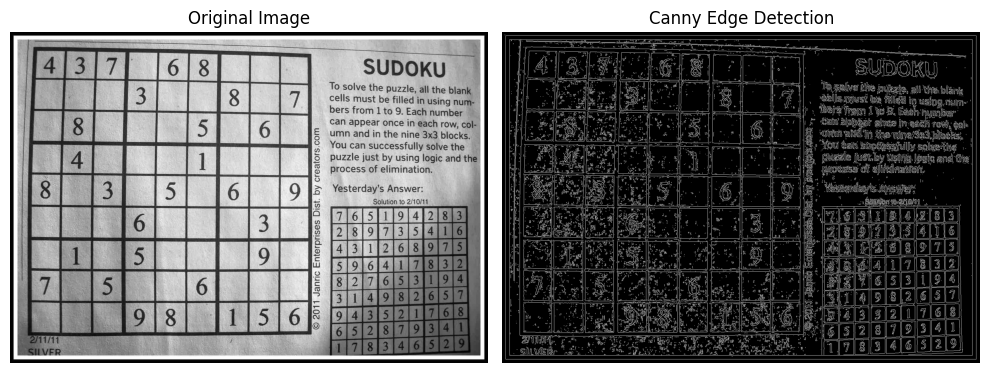

In [11]:
# Canny Edge Detection

# Apply Canny edge detection
lower_threshold = 100
upper_threshold = 120
edges = cv2.Canny(img, lower_threshold, upper_threshold)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

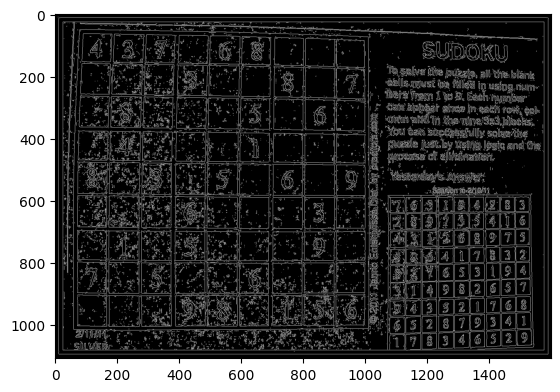

In [13]:
# Apply Canny edge detection
lower_threshold = 100
upper_threshold = 120
edges = cv2.Canny(img, lower_threshold, upper_threshold)
plt.imshow(edges, cmap='gray')

## White Balancing

In [14]:
import cv2

In [15]:
image_path = '/content/drive/MyDrive/Colab Notebooks/pexels-maxandrey-1366630.jpg'
image = cv2.imread(image_path)

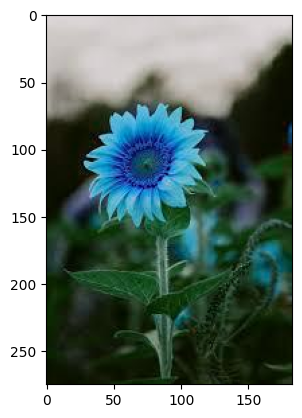

In [16]:
plt.imshow(image)

In [17]:
image.shape

(275, 183, 3)

In [18]:
avg_color = np.mean(image, axis=(0, 1))
print('average color', avg_color)

average color [68.50243418 91.67632389 83.34225534]


average color [68.50243  91.67632  83.342255]
scaling factor [1.8685467 1.3962165 1.5358356]
max and min value 420.423 0.0
average color [68.50243  91.67632  83.342255]
scaling factor [0.7299011  0.5453971  0.59993577]
max and min value 164.22774 0.0


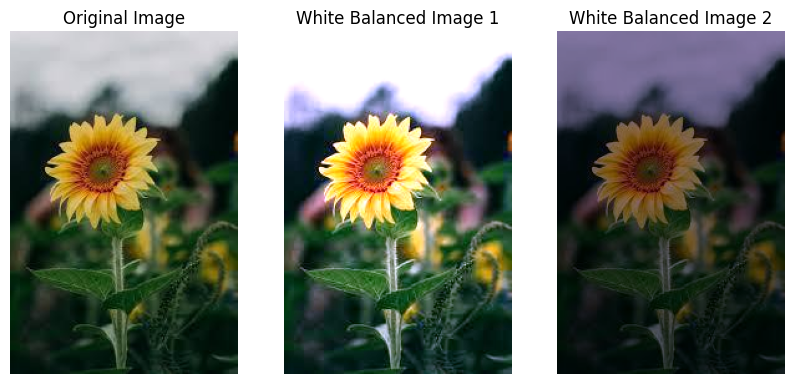

In [20]:
def white_balance(image, sf=128):
    # Convert the image to float32
    img_float = image.astype(np.float32)

    # Calculate the average color of the image
    avg_color = np.mean(img_float, axis=(0, 1))
    print('average color', avg_color)

    # Calculate the scaling factors
    scale = sf / avg_color
    print('scaling factor', scale)

    # Apply the scaling factors to each channel
    img_balanced = img_float * scale
    print('max and min value', np.max(img_balanced), np.min(img_balanced))
    # Clip the values to be in the valid range [0, 255]
    img_balanced = np.clip(img_balanced, 0, 255).astype(np.uint8)

    return img_balanced

# Load an image
image_path = '/content/drive/MyDrive/Colab Notebooks/pexels-maxandrey-1366630.jpg'
image = cv2.imread(image_path)

# print(image.shape) # (height, width, channels)

# Perform white balancing
balanced_image_1 = white_balance(image)

balanced_image_2 = white_balance(image, sf=50)

# Display the original and balanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(balanced_image_1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('White Balanced Image 1')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(balanced_image_2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('White Balanced Image 2')

plt.show()